# **Import Library**

---



In [ ]:
!apt-get update -y
!apt-get install python3.10

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

In [ ]:
!python --version

Python 3.10.12


In [ ]:
!pip install TensorFlow==2.15.0
!pip install tensorflow-decision-forests==1.8.1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation, Dropout
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint

# **Connect to drive**

---


In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# **Check Number of Images**

In [3]:
os.listdir('/content/drive/MyDrive/db/jenis-hewan')

#number of images of each classes in the train folder
# Menghitung dan mencetak jumlah gambar untuk setiap jenis hewan
print(f"There are {len(os.listdir('/content/drive/MyDrive/db/jenis-hewan/train/Bekantan'))} train set images of Bekantan.")
print(f"There are {len(os.listdir('/content/drive/MyDrive/db/jenis-hewan/train/Beruang Madu'))} train set images of Beruang Madu.")
print(f"There are {len(os.listdir('/content/drive/MyDrive/db/jenis-hewan/train/Cendrawasih'))} train set images of Cendrawasih.")
print(f"There are {len(os.listdir('/content/drive/MyDrive/db/jenis-hewan/train/Burung Jalak Bali'))} train set images of Burung Jalak Bali.")
print(f"There are {len(os.listdir('/content/drive/MyDrive/db/jenis-hewan/train/Burung Rangkong Badak'))} train set images of Burung Rangkong Badak.")
print(f"There are {len(os.listdir('/content/drive/MyDrive/db/jenis-hewan/train/Elang Jawa'))} train set images of Elang Jawa.")
print(f"There are {len(os.listdir('/content/drive/MyDrive/db/jenis-hewan/train/Gajah Sumatra'))} train set images of Gajah Sumatra.")
print(f"There are {len(os.listdir('/content/drive/MyDrive/db/jenis-hewan/train/Harimau Sumatra'))} train set images of Harimau Sumatra.")
print(f"There are {len(os.listdir('/content/drive/MyDrive/db/jenis-hewan/train/Kakatua Jambul Kuning'))} train set images of Kakatua Jambul Kuning.")
print(f"There are {len(os.listdir('/content/drive/MyDrive/db/jenis-hewan/train/Komodo'))} train set images of Komodo.")
print(f"There are {len(os.listdir('/content/drive/MyDrive/db/jenis-hewan/train/Kupu-Kupu Raja'))} train set images of Kupu-Kupu Raja.")
print(f"There are {len(os.listdir('/content/drive/MyDrive/db/jenis-hewan/train/Orangutan Kalimantan'))} train set images of Orangutan Kalimantan.")
print(f"There are {len(os.listdir('/content/drive/MyDrive/db/jenis-hewan/train/Owa Jawa'))} train set images of Owa Jawa.")
print(f"There are {len(os.listdir('/content/drive/MyDrive/db/jenis-hewan/train/Siamang'))} train set images of Siamang.")
print()

#now return the list of the content in that val folder
# Menghitung dan mencetak jumlah gambar untuk setiap jenis hewan di folder val
print(f"There are {len(os.listdir('/content/drive/MyDrive/db/jenis-hewan/val/Bekantan'))} validation set images of Bekantan.")
print(f"There are {len(os.listdir('/content/drive/MyDrive/db/jenis-hewan/val/Beruang Madu'))} validation set images of Beruang Madu.")
print(f"There are {len(os.listdir('/content/drive/MyDrive/db/jenis-hewan/val/Cendrawasih'))} validation set images of Cendrawasih.")
print(f"There are {len(os.listdir('/content/drive/MyDrive/db/jenis-hewan/val/Burung Jalak Bali'))} validation set images of Burung Jalak Bali.")
print(f"There are {len(os.listdir('/content/drive/MyDrive/db/jenis-hewan/val/Burung Rangkong Badak'))} validation set images of Burung Rangkong Badak.")
print(f"There are {len(os.listdir('/content/drive/MyDrive/db/jenis-hewan/val/Elang Jawa'))} validation set images of Elang Jawa.")
print(f"There are {len(os.listdir('/content/drive/MyDrive/db/jenis-hewan/val/Gajah Sumatra'))} validation set images of Gajah Sumatra.")
print(f"There are {len(os.listdir('/content/drive/MyDrive/db/jenis-hewan/val/Harimau Sumatra'))} validation set images of Harimau Sumatra.")
print(f"There are {len(os.listdir('/content/drive/MyDrive/db/jenis-hewan/val/Kakatua Jambul Kuning'))} validation set images of Kakatua Jambul Kuning.")
print(f"There are {len(os.listdir('/content/drive/MyDrive/db/jenis-hewan/val/Komodo'))} validation set images of Komodo.")
print(f"There are {len(os.listdir('/content/drive/MyDrive/db/jenis-hewan/val/Kupu-Kupu Raja'))} validation set images of Kupu-Kupu Raja.")
print(f"There are {len(os.listdir('/content/drive/MyDrive/db/jenis-hewan/val/Orangutan Kalimantan'))} validation set images of Orangutan Kalimantan.")
print(f"There are {len(os.listdir('/content/drive/MyDrive/db/jenis-hewan/val/Owa Jawa'))} validation set images of Owa Jawa.")
print(f"There are {len(os.listdir('/content/drive/MyDrive/db/jenis-hewan/val/Siamang'))} validation set images of Siamang.")
print()

#now return the list of the content in that test folder
# Menghitung dan mencetak jumlah gambar untuk setiap jenis hewan di folder test
print(f"There are {len(os.listdir('/content/drive/MyDrive/db/jenis-hewan/test/Bekantan'))} test set images of Bekantan.")
print(f"There are {len(os.listdir('/content/drive/MyDrive/db/jenis-hewan/test/Beruang Madu'))} test set images of Beruang Madu.")
print(f"There are {len(os.listdir('/content/drive/MyDrive/db/jenis-hewan/test/Cendrawasih'))} test set images of Cendrawasih.")
print(f"There are {len(os.listdir('/content/drive/MyDrive/db/jenis-hewan/test/Burung Jalak Bali'))} test set images of Burung Jalak Bali.")
print(f"There are {len(os.listdir('/content/drive/MyDrive/db/jenis-hewan/test/Burung Rangkong Badak'))} test set images of Burung Rangkong Badak.")
print(f"There are {len(os.listdir('/content/drive/MyDrive/db/jenis-hewan/test/Elang Jawa'))} test set images of Elang Jawa.")
print(f"There are {len(os.listdir('/content/drive/MyDrive/db/jenis-hewan/test/Gajah Sumatra'))} test set images of Gajah Sumatra.")
print(f"There are {len(os.listdir('/content/drive/MyDrive/db/jenis-hewan/test/Harimau Sumatra'))} test set images of Harimau Sumatra.")
print(f"There are {len(os.listdir('/content/drive/MyDrive/db/jenis-hewan/test/Kakatua Jambul Kuning'))} test set images of Kakatua Jambul Kuning.")
print(f"There are {len(os.listdir('/content/drive/MyDrive/db/jenis-hewan/test/Komodo'))} test set images of Komodo.")
print(f"There are {len(os.listdir('/content/drive/MyDrive/db/jenis-hewan/test/Kupu-Kupu Raja'))} test set images of Kupu-Kupu Raja.")
print(f"There are {len(os.listdir('/content/drive/MyDrive/db/jenis-hewan/test/Orangutan Kalimantan'))} test set images of Orangutan Kalimantan.")
print(f"There are {len(os.listdir('/content/drive/MyDrive/db/jenis-hewan/test/Owa Jawa'))} test set images of Owa Jawa.")
print(f"There are {len(os.listdir('/content/drive/MyDrive/db/jenis-hewan/test/Siamang'))} test set images of Siamang.")
print()

NameError: name 'os' is not defined

# **Path Declaration**

---



In [ ]:
TRAINING_DIR = "/content/drive/MyDrive/db/jenis-hewan/train"
VALIDATION_DIR = "/content/drive/MyDrive/db/jenis-hewan/val"
TESTING_DIR = "/content/drive/MyDrive/db/jenis-hewan/test"


# **Generator**

---



In [ ]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):

  # train
  train_datagen = ImageDataGenerator(rescale = 1.0/255.,
                                     fill_mode='nearest',
                                     rotation_range=80,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.3,
                                     horizontal_flip=True
                                     )
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=32,
                                                      class_mode='categorical',
                                                      target_size=(224, 224))

  # val
  validation_datagen =ImageDataGenerator(rescale = 1.0/255. )
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=32,
                                                                class_mode='categorical',
                                                                target_size=(224, 224))

  return train_generator, validation_generator

In [ ]:
# Test generators
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

# **Show Images Sample**

---



In [ ]:
def show_image_samples(gen):
  train_dict = train_generator.class_indices
  classes = list(train_dict.keys())
  images, labels = next(gen) #get a sample batch from generator
  plt.figure(figsize=(20,20))
  length = len(labels)
  if length < 10:
    r = length
  else:
    r = 12
  for i in range(r):
    plt.subplot(6, 6, i+1)
    image = images[i]
    plt.imshow(image)
    index = np.argmax(labels[i])
    class_name = classes[index]
    plt.title(class_name, color='black', fontsize=18)
    plt.axis('off')
  plt.show()



In [ ]:
show_image_samples(train_generator)

# **Create MODEL**

---



In [ ]:
base_model = tf.keras.applications.mobilenet_v2.MobileNetV2(input_shape = (224, 224, 3),
                                                            include_top = False,
                                                            weights = "imagenet")

In [ ]:
base_model.trainable = False

#Transfer Learning 1


In [ ]:
inputs = tf.keras.Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(1024, activation="relu")(x)
x = tf.keras.layers.Dense(512, activation="relu")(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(10, activation="softmax")(x)

model = tf.keras.Model(inputs, outputs)
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])



In [ ]:
# Mendefenisikan fungsi Callback
import tensorflow as tf
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Model Checkpoint
checkpoint_path = 'model_checkpoints/Hewan.weights.h5'
checkpoint_dir = os.path.dirname(checkpoint_path)
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    save_weights_only=True, # Changed save_weight_only to save_weights_only
    verbose=2
)

In [ ]:
# Change the number of neurons in the output layer to 14
outputs = tf.keras.layers.Dense(14, activation="softmax")(x)

# Redefine the model with the updated output layer
model = tf.keras.Model(inputs, outputs)
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

# **Grafik Accuracy & Loss**

---



In [ ]:
# Train the model and store the training history
history = model.fit(
    train_generator,
    epochs=50,  # Adjust the number of epochs as needed
    validation_data=validation_generator,
    callbacks=[checkpoint]  # Include the checkpoint callback if defined
)

# training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# loss plot
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')
plt.show()
print()

# accuracy plot
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

In [ ]:
TEST_DIR = TESTING_DIR
test_datagen = ImageDataGenerator(rescale = 1.0 / 255. )

# pass in the appropriate arguments to the flow_from_directory method
test_set_2 = test_datagen.flow_from_directory(directory=TEST_DIR,
                                                      batch_size=16,
                                                      class_mode='categorical',
                                                      target_size=(224, 224))

In [ ]:
Y_pred_2 = model.predict(test_set_2)
y_pred_2 = np.argmax(Y_pred_2, axis=1)

1/1 [==============================] - 2s 2s/step


In [ ]:
print(classification_report(test_set_2.classes, y_pred_2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       1.00      1.00      1.00         1
          13       0.00      0.00      0.00         1

    accuracy                           0.14        14
   macro avg       0.14      0.14      0.14        14
weighted avg       0.14      0.14      0.14        14



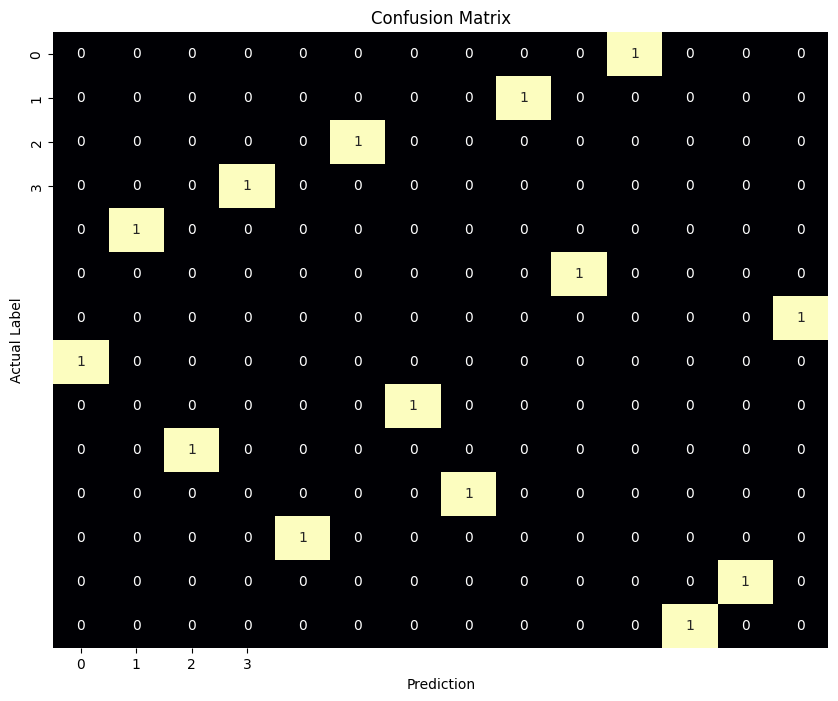

In [ ]:

y_true = test_set_2.classes  # actual label
y_pred = y_pred_2  # prediction label

# confusion matrix
cm = confusion_matrix(y_true, y_pred)

# confusion matrix heatmap
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13']
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='magma', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Prediction')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
def predict_image(image_upload, model = model):
  im = image_upload
  im_array = np.asarray(im)
  im_array = im_array*(1.0/225.0)
  im_input = tf.reshape(im_array, shape = [1, 224, 224, 3])

  predict_array = model.predict(im_input)[0]

  import pandas as pd
  df = pd.DataFrame(predict_array)
  df = df.rename({0:'Probability'}, axis = 'columns')
  prod = [
      "Bekantan",
      "Beruang Madu",
      "Cendrawasih",
      "Burung Jalak Bali",
      "Burung Rangkong Badak",
      "Elang Jawa",
      "Gajah Sumatra",
      "Harimau Sumatra",
      "Kakatua Jambul Kuning",
      "Komodo",
      "Kupu-Kupu Raja",
      "Orangutan Kalimantan",
      "Owa Jawa",
      "Siamang",
    ]
  df['hewan'] = prod
  df = df[['hewan', 'Probability']]

  predict_label = np.argmax(model.predict(im_input))

  if predict_label == 0:
      predict_product = 'Bekantan'
  elif predict_label == 1:
    predict_product = 'Beruang Madu'
  elif predict_label == 2:
      predict_product = 'Cendrawasih'
  elif predict_label == 3:
      predict_product = 'Burung Jalak Bali'
  elif predict_label == 4:
      predict_product = 'Burung Rangkong Badak'
  elif predict_label == 5:
      predict_product = 'Elang Jawa'
  elif predict_label == 6:
      predict_product = 'Gajah Sumatra'
  elif predict_label == 7:
      predict_product = 'Harimau Sumatra'
  elif predict_label == 8:
      predict_product = 'Kakatua Jambul Kuning'
  elif predict_label == 9:
      predict_product = 'Komodo'
  elif predict_label == 10:
      predict_product = 'Kupu-Kupu Raja'
  elif predict_label == 11:
      predict_product = 'Orangutan Kalimantan'
  elif predict_label == 12:
      predict_product = 'Owa Jawa'
  elif predict_label == 13:
      predict_product = 'Siamang'
  else:
      predict_product = 'Unknown'
  return predict_product, df

Saving Image_1.jpg to Image_1.jpg
1/1 [==============================] - 0s 25ms/step




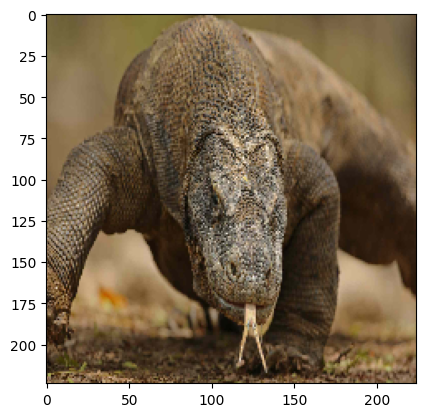


The image is detected as Komodo


                    hewan   Probability
0                Bekantan  2.935055e-12
1            Beruang Madu  2.653922e-09
2             Cendrawasih  7.540019e-12
3       Burung Jalak Bali  7.843546e-13
4   Burung Rangkong Badak  1.287412e-11
5              Elang Jawa  1.187526e-09
6           Gajah Sumatra  4.809012e-07
7         Harimau Sumatra  2.351829e-08
8   Kakatua Jambul Kuning  1.078878e-11
9                  Komodo  9.999995e-01
10         Kupu-Kupu Raja  3.298127e-12
11   Orangutan Kalimantan  2.513587e-11
12               Owa Jawa  3.698099e-11
13                Siamang  3.082642e-12




In [ ]:
from keras.preprocessing import image
from google.colab import files


uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = tf.keras.preprocessing.image.load_img(path, target_size=(224, 224))
  imgplot = plt.imshow(img)
  x = tf.keras.preprocessing.image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  img = np.vstack([x])

label, df = predict_image(img)

print('\n')
plt.show()
print("\nThe image is detected as " + label)
print('\n')
print(df)
print('\n')

In [ ]:
#Save model to h5 format

model.save("Hewan-Model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:

from keras.models import model_from_json

#Save model to JSON format
model_json = model.to_json()
with open("ModelHewan.json", "w") as json_file:
    json_file.write(model_json)


In [ ]:
!sudo pip3 install tensorflowjs==4.20.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 7.6 MB/s eta 0:00:00
  Attempting uninstall: tensorflowjs
    Found existing installation: tensorflowjs 4.22.0
    Uninstalling tensorflowjs-4.22.0:
      Successfully uninstalled tensorflowjs-4.22.0


In [ ]:
!sudo tensorflowjs_converter

2024-12-10 08:28:05.453600: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-10 08:28:05.453675: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-10 08:28:05.455317: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-10 08:28:05.469072: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-10 08:28:09.237421: W tensorflow/comp

In [ ]:
!tensorflowjs_converter --input_format=keras '/content/Hewan-Model.h5' "/content/drive/MyDrive/json"

2024-12-10 08:28:20.284431: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-10 08:28:20.284506: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-10 08:28:20.286163: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-10 08:28:21.832741: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
